# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
from scipy import stats
medical = pd.read_csv('/content/drive/MyDrive/DS-SB/Case Study - Frequentist Inference: A/insurance2.csv')

In [31]:
medical.shape

(1338, 8)

In [32]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<Axes: >

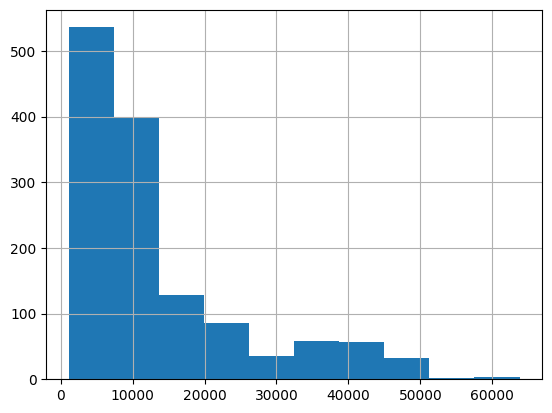

In [33]:
medical['charges'].hist()

In [34]:
print('The Mean and S.D of the charges are: {} and {} respectively'.format(medical['charges'].mean(),medical['charges'].std()))

The Mean and S.D of the charges are: 13270.422265141257 and 12110.011236694001 respectively


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The data represents a random sample, allowing statistical inference. To test if the average charge has fallen below 12,000, a one-sample t-test is appropriate. The null hypothesis is the mean charge is 12,000; the alternative is it's less. This test compares the sample mean to 12,000 to see if it's statistically significant.

-- Data are highly skewed on left.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The concern is about the average charge falling below 12,000. For this, a one-sided confidence interval is appropriate since we're interested specifically in charges being lower. We'll calculate the critical value using the t-distribution and a 95% confidence level to see if the average charge is significantly less than 12,000.

In [35]:
n = medical['charges'].count()  # Number of observations
t_critical = t.ppf(0.95, n - 1)  # Calculating the critical t-value
margin_of_error = t_critical * (medical['charges'].std() / np.sqrt(n))  # Calculating the margin of error
lower_confidence_interval = medical['charges'].mean() - margin_of_error  # Calculating the lower bound of the confidence interval
print(lower_confidence_interval)  # Printing the lower bound


12725.48718381623


The calculated lower bound of the one-sided 95% confidence interval for the mean charge is approximately 12,725. This means that with 95% confidence, we estimate that the true average charge is at least 12,725.

In the context of the administrator's concern (that the average charge has fallen below 12,000), this interval suggests that the lower limit of the average charge is above 12,000. Therefore, based on this analysis, there isn't sufficient evidence to support the administrator's concern that the average charge has dropped below 12,000.

As the lower boundary significantly exceeds $12,000, there's no cause for concern for the administrator.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: The means of the two groups are equal.

Alternative hypothesis: There is a significant difference between the means of the two groups.

Assumption: The variances of the two groups are assumed to be equal, known as homogeneity of variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  Manual Approach

In [36]:
# Defining insured and uninsured
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']
# Mean and standard deviation for insured and uninsured
mean_insured = np.mean(insured)
std_insured = np.std(insured)
mean_uninsured = np.mean(uninsured)
std_uninsured = np.std(uninsured)
print('mean and std of insured and uninsured people are: {}, {}, {}, and {} respectively'.format(mean_insured,std_insured,mean_uninsured,std_uninsured))

mean and std of insured and uninsured people are: 16423.928276537677, 14036.956250260417, 8821.421892306305, and 6440.699841605235 respectively


In [37]:
#test_statistics calculation
n1 = len(insured)
n2 = len(uninsured)
s1 = np.std(insured)
s2 = np.std(uninsured)
mean1 = mean_insured
mean2 = mean_uninsured

sp = np.sqrt( ((n1-1)*(s1)**2 + (n2-1)*(s2)**2)/ (n1+n2-2) )
tm = (mean2 - mean1)/(sp * np.sqrt(1/n1 + 1/n2))
print(tm, norm.pdf(tm))

-11.901306943555388 6.981270779090164e-32


__Other way:__ Direct

In [38]:
t, p_val = stats.ttest_ind(uninsured, insured, equal_var = True)
print(t, p_val)

-11.893299030876712 4.461230231620717e-31


In [39]:
# Comparing results
print("Manual calculation - t-statistic:", tm)
print("Scipy t-test - t-statistic:", t)
print("Manual calculation - p-value:", norm.pdf(tm))
print("Scipy t-test - p-value:", p_val)

Manual calculation - t-statistic: -11.901306943555388
Scipy t-test - t-statistic: -11.893299030876712
Manual calculation - p-value: 6.981270779090164e-32
Scipy t-test - p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy.stats doesn't have a direct function for z-tests from samples. Other libraries like statsmodels or manual calculation are used for z-tests as they usually require known population parameters. scipy.stats.zscore doesn't perform z-tests for hypothesis testing; it's used for standardizing data. For z-tests, consider using other libraries like statsmodels or manual calculation

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test